In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
# I do not use this code as solutions temporily, please go and check the hate_speech.ipynb file

In [2]:
for dirname, _, filenames in os.walk('../../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename).replace('\\','/'))

../../data/cyberbullying_tweets(Kaggle).csv
../../data/hate_speech.csv
../../data/NAACL_SRW_2016.csv
../../data/twitter_en.csv


In [7]:
df = pd.read_csv('../../data/clean_kaggle.csv',index_col=0)
df.head()

,text,cyberbullying_type,bulley_type,texts_cleaned
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0,word katandandre food wa crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0,xochitlsuckkks classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0,jason_gio meh p thanks head concerned another ...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0,rudhoeenglish isi account pretending kurdish a...


In [8]:
df = df[~df['texts_cleaned'].isnull()]

In [10]:
cv = CountVectorizer(analyzer='word',min_df=0.001)
content  = df.texts_cleaned
vector = cv.fit_transform(content)
data = vector.toarray()
index_name = cv.get_feature_names_out()
tfidf = TfidfTransformer()
x_tf = tfidf.fit_transform(vector)

In [28]:
# train and test
X_train, X_test, y_train, y_test = train_test_split(x_tf, df['bulley_type'], test_size=0.20, stratify=df['bulley_type'], random_state=42)

In [29]:
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_pre = clf.predict(X_test)
accuracy_score(y_test,y_pre)

0.8537404259783863

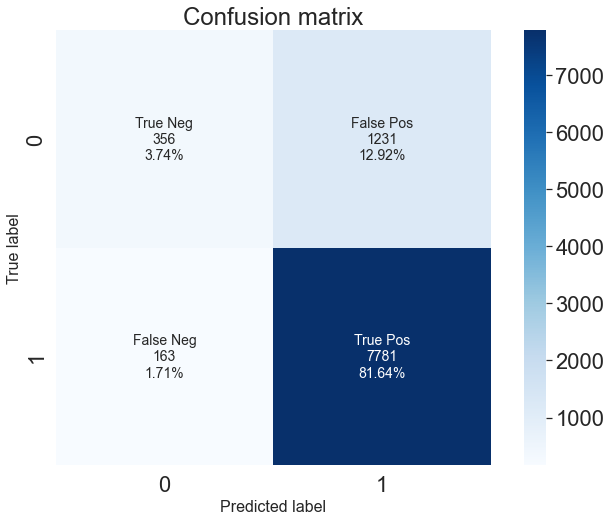

In [43]:
#confusion matrix
from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize=(12,8))
mx = confusion_matrix(y_test,y_pre)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                mx.flatten()]
group_percentages = ["{:.2%}".format(value) for value in mx.flatten()/np.sum(mx) ]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.array(labels).reshape(2,2)
sns.heatmap(data=mx,annot=labels,fmt='',cmap='Blues',square=True,annot_kws={"fontsize":14}).set(title='Confusion matrix')
plt.xlabel('Predicted label',fontsize=16)
plt.ylabel('True label',fontsize=16)
plt.savefig('./confusion_matrix.png')


In [ ]:
#record data
#